In [2]:
from IPython.display import Image
import matplotlib.pyplot as plt
import matplotlib 
import numpy as np
import pandas as pd
%matplotlib inline
matplotlib.rcParams['figure.figsize']= [10,10]


In [13]:
from sklearn.datasets import load_iris
datos= load_iris()
print(datos.DESCR) 

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [14]:
iris=pd.DataFrame(datos.data, columns=datos.feature_names)


In [15]:
iris['objetivo']= datos.target 
datos.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [16]:
iris.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),objetivo
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0


In [20]:
variables_inde=iris.drop('objetivo', axis=1).columns
variable_objetivo= 'objetivo'
iris_X= iris[variables_inde]
iris_y= iris[variable_objetivo]

In [27]:
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import f1_score 

In [53]:
iris_X_train, iris_X_test, iris_y_train, iris_y_test = train_test_split(iris_X, iris_y, test_size=0.2)
estimador_svm = SVC()
estimador_svm.fit(iris_X_train, iris_y_train)
y_preds=estimador_svm.predict(iris_X_test)
f1_score(iris_y_test, y_preds, average='weighted' )

1.0

In [35]:
def f1_score_micro(estimador,X, y):
  preds=estimador.predict(X)
  return f1_score(y, preds, average= 'micro')

def f1_score_macro(estimador,X, y):
  preds=estimador.predict(X)
  return f1_score(y, preds, average= 'macro')

def f1_score_weighted(estimador,X, y):
  preds=estimador.predict(X)
  return f1_score(y, preds, average= 'weighted')


In [41]:
estimador_svm_cross_micro=SVC()
error_cvs_micro=cross_val_score(estimador_svm_cross_micro, iris_X, iris_y, scoring=f1_score_micro).mean()

estimador_svm_cross_macro=SVC()
error_cvs_macro=cross_val_score(estimador_svm_cross_macro, iris_X, iris_y, scoring=f1_score_macro).mean()

estimador_svm_cross_weighted=SVC()
error_cvs_weighted=cross_val_score(estimador_svm_cross_weighted, iris_X, iris_y, scoring=f1_score_weighted).mean()

In [42]:
resultados={'metrica micro': error_cvs_micro,
           'metrica macro': error_cvs_macro,
           'metrica weigted': error_cvs_weighted}
resultados

{'metrica macro': 0.9666165413533834,
 'metrica micro': 0.9666666666666666,
 'metrica weigted': 0.9666165413533834}

In [57]:
X=datos.data[:,:2]
Y= datos.target
from mlxtend.plotting import plot_decision_regions



/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


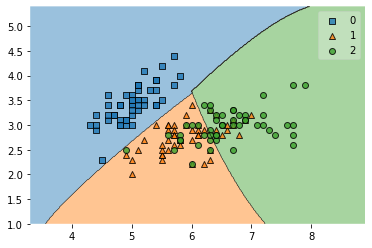

In [58]:
estimador_svm_gauss=SVC(kernel='rbf')
estimador_svm_gauss.fit(X,Y)

plot_decision_regions(X,Y, clf=estimador_svm_gauss);
